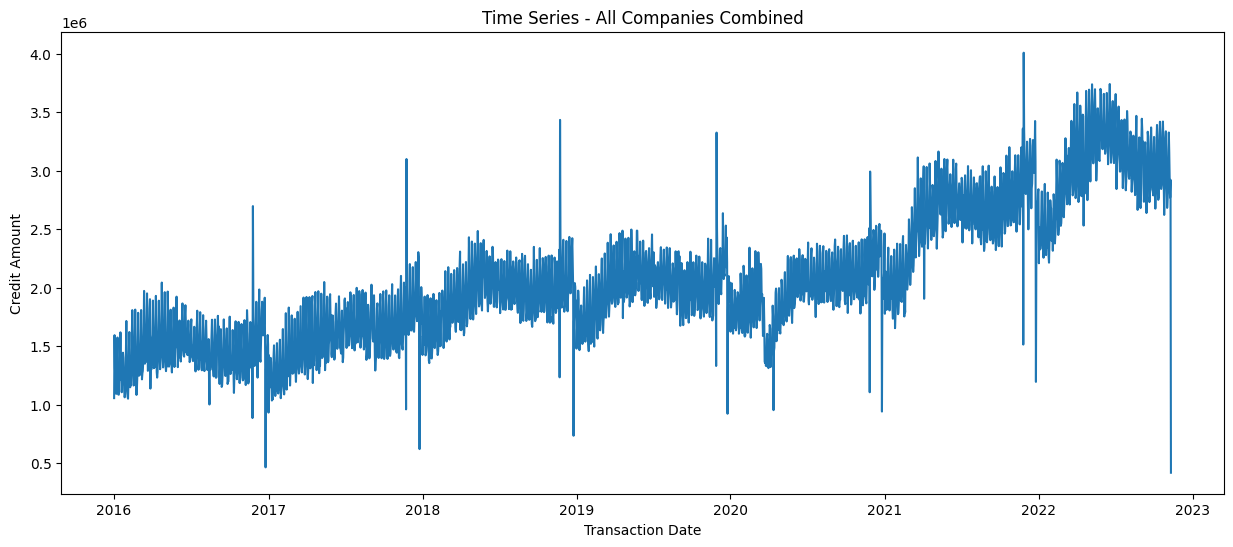

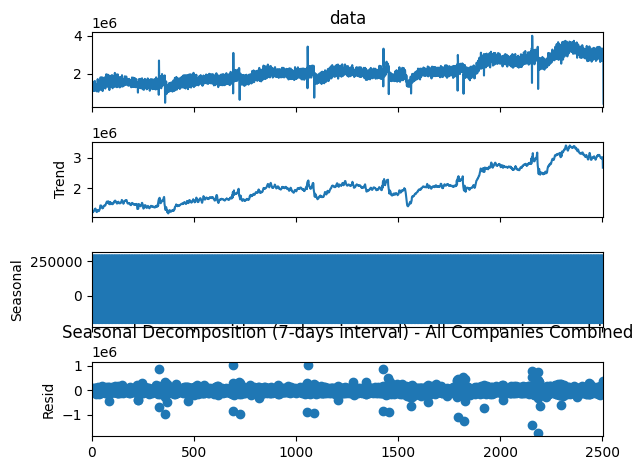

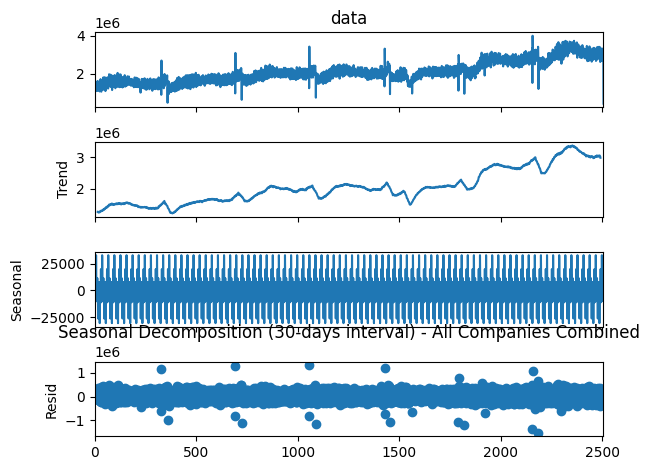

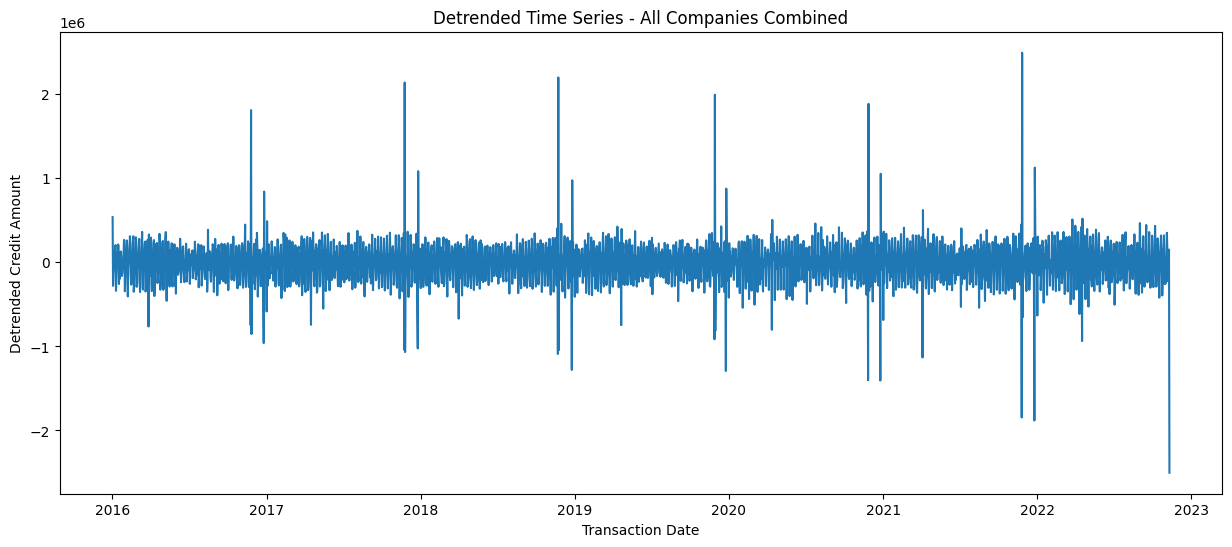

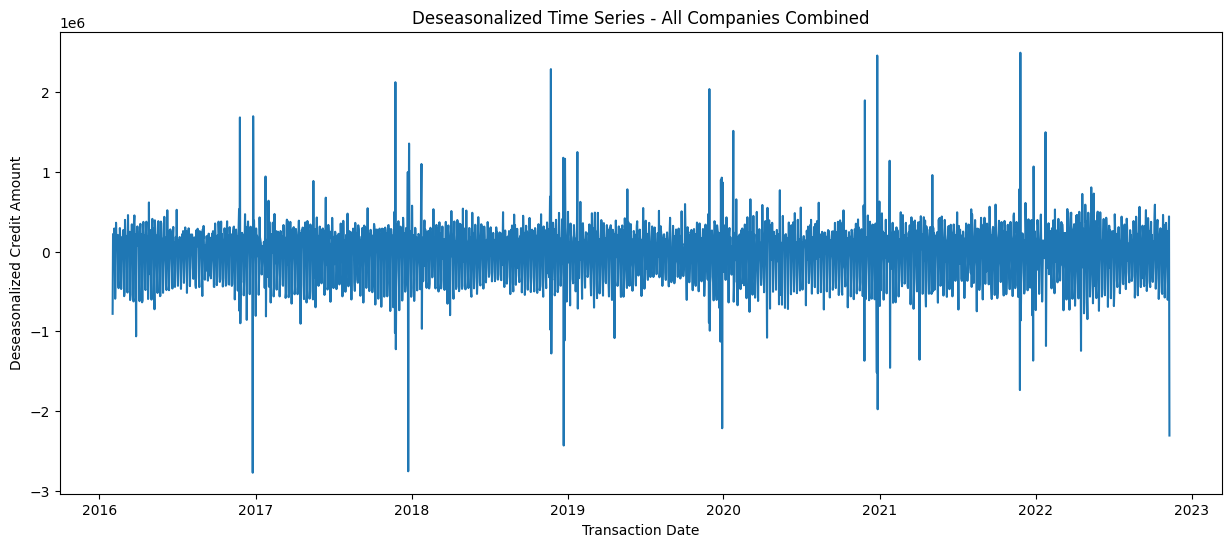

In [ ]:
# Required Libraries in Alphabetical Order
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

class CreditDataAnalysis:
    def __init__(self, data_path):
        """
        Initialize the CreditDataAnalysis class with the path to the data.
        Load and preprocess the data.
        """
        # Load the data and convert the 'trans_date' column to datetime format
        self.data = pd.read_csv(data_path)
        self.data['trans_date'] = pd.to_datetime(self.data['trans_date'])
        # Aggregate data by date for all companies combined
        self.data_combined = self.data.groupby('trans_date')['data'].sum().reset_index()

    def plot_combined_data(self):
        """
        Plot the time series data for all companies combined.
        """
        plt.figure(figsize=(15, 6))
        plt.plot(self.data_combined['trans_date'], self.data_combined['data'])
        plt.title('Time Series - All Companies Combined')
        plt.xlabel('Transaction Date')
        plt.ylabel('Credit Amount')
        plt.show()

    def seasonal_decompose(self, period):
        """
        Perform and plot seasonal decomposition.
        """
        # Perform seasonal decomposition with a specified frequency
        result = seasonal_decompose(self.data_combined['data'], model='additive', period=period)
        # Plot the results of decomposition
        result.plot()
        plt.title(f'Seasonal Decomposition ({period}-days interval) - All Companies Combined')
        plt.show()

    def detrend_and_deseasonalize(self):
        """
        Detrend and deseasonalize the data. Plot the results.
        """
        # Detrend the data
        self.data_combined['data_detrended'] = self.data_combined['data'].diff()
        # Deseasonalize the data (assuming monthly seasonality)
        self.data_combined['data_deseasonalized'] = self.data_combined['data_detrended'].diff(30)

        # Plot the detrended data
        plt.figure(figsize=(15, 6))
        plt.plot(self.data_combined['trans_date'], self.data_combined['data_detrended'])
        plt.title('Detrended Time Series - All Companies Combined')
        plt.xlabel('Transaction Date')
        plt.ylabel('Detrended Credit Amount')
        plt.show()

        # Plot the deseasonalized data
        plt.figure(figsize=(15, 6))
        plt.plot(self.data_combined['trans_date'], self.data_combined['data_deseasonalized'])
        plt.title('Deseasonalized Time Series - All Companies Combined')
        plt.xlabel('Transaction Date')
        plt.ylabel('Deseasonalized Credit Amount')
        plt.show()

# Note: To load the data, either specify the local path or include the path where it's stored.

data_path = 'data4columbia_credit.csv'
cda = CreditDataAnalysis(data_path)
cda.plot_combined_data()
cda.seasonal_decompose(7)  # Weekly decomposition
cda.seasonal_decompose(30)  # Monthly decomposition
cda.detrend_and_deseasonalize()